### Reglas de Asociación: Apriori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import pandas as pd
# Read the data
bakery=pd.read_csv("BreadBasket.csv")
bakery.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [2]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [3]:
NAs = ["NONE", "None", "nan", "none", 0]
bakery[bakery.Item.isin(NAs)]

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [4]:
to_drop = bakery[bakery['Item'].isin(["NONE", "None", "nan", "none", 0])]
bakery = bakery.drop(to_drop.index)
bakery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [5]:
bakery['Time'] = pd.to_datetime(bakery['Time']).dt.hour
bakery.head(15)

/tmp/ipykernel_5312/3084275104.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bakery['Time'] = pd.to_datetime(bakery['Time']).dt.hour


,Date,Time,Transaction,Item
0,2016-10-30,9,1,Bread
1,2016-10-30,10,2,Scandinavian
2,2016-10-30,10,2,Scandinavian
3,2016-10-30,10,3,Hot chocolate
4,2016-10-30,10,3,Jam
5,2016-10-30,10,3,Cookies
6,2016-10-30,10,4,Muffin
7,2016-10-30,10,5,Coffee
8,2016-10-30,10,5,Pastry
9,2016-10-30,10,5,Bread


In [6]:
bakery['Time'].min(), bakery['Time'].max()

(np.int32(1), np.int32(23))

In [7]:
def time_function(x):
	if (x > 0) and (x <= 7):
		return 'Early Morning (00:00 - 7:00)'
	elif (x > 7) and (x <= 12):
		return 'Morning (7:00 - 12:00)'
	elif (x > 12) and (x <= 19):
		return 'Afternoon (12:00 - 19:00)'
	else:
		return 'Evening (19:00 - 00:00)'

bakery['Time_of_day'] = bakery['Time'].apply(time_function)
bakery

,Date,Time,Transaction,Item,Time_of_day
0,2016-10-30,9,1,Bread,Morning (7:00 - 12:00)
1,2016-10-30,10,2,Scandinavian,Morning (7:00 - 12:00)
2,2016-10-30,10,2,Scandinavian,Morning (7:00 - 12:00)
3,2016-10-30,10,3,Hot chocolate,Morning (7:00 - 12:00)
4,2016-10-30,10,3,Jam,Morning (7:00 - 12:00)
...,...,...,...,...,...
21288,2017-04-09,14,9682,Coffee,Afternoon (12:00 - 19:00)
21289,2017-04-09,14,9682,Tea,Afternoon (12:00 - 19:00)
21290,2017-04-09,14,9683,Coffee,Afternoon (12:00 - 19:00)
21291,2017-04-09,14,9683,Pastry,Afternoon (12:00 - 19:00)


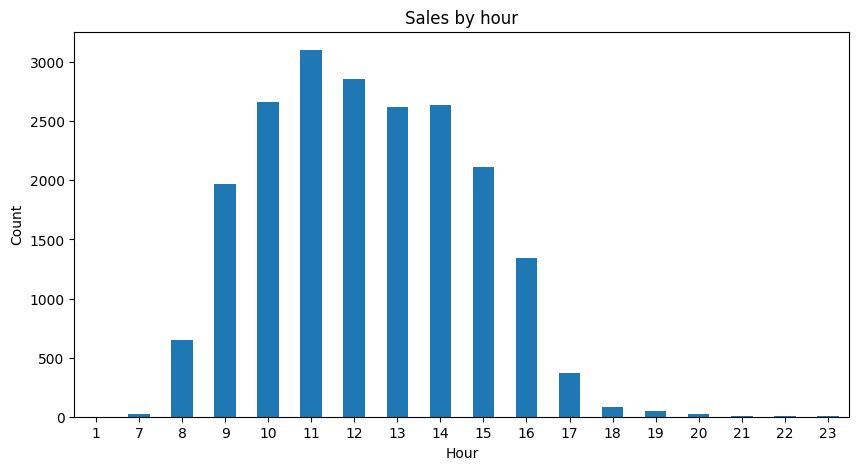

In [8]:
(bakery.groupby('Time').agg({'Item': lambda item: item.count()})
 .plot(kind='bar', figsize=(10,5), legend=False, xlabel='Hour', ylabel='Count', title='Sales by hour'))
plt.xticks(rotation = 0);

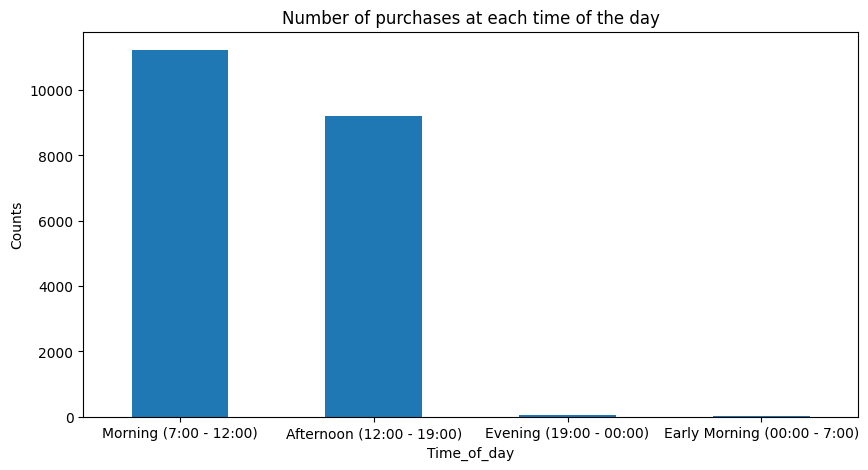

In [9]:
bakery['Time_of_day'].value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel('Counts')
plt.title('Number of purchases at each time of the day')
plt.xticks(rotation = 0);

In [10]:
len(bakery['Item'].unique())

94

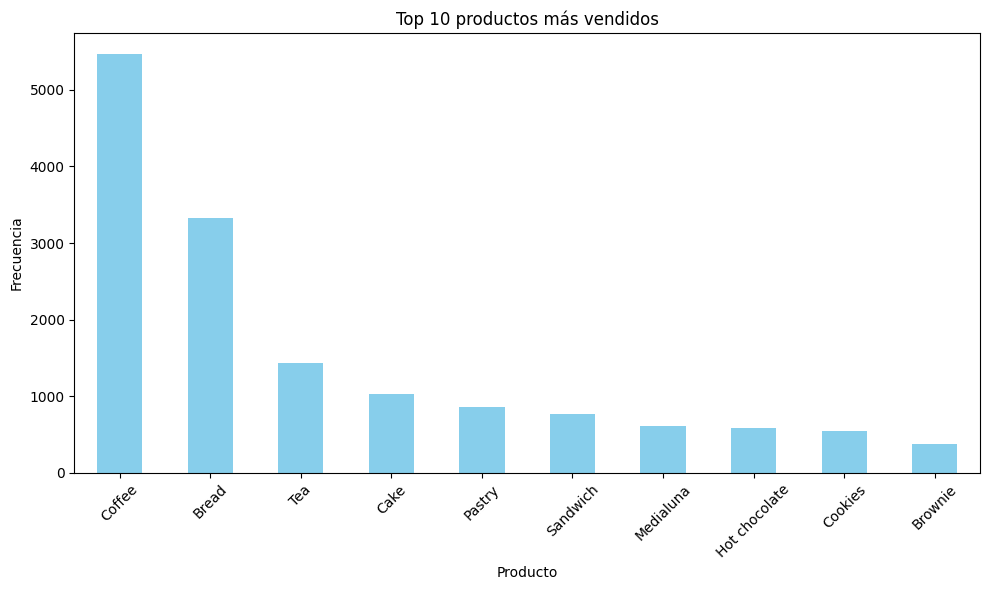

In [13]:
# Agrupar por 'Item' y contar la frecuencia
item_counts = bakery['Item'].value_counts().head(10) # Top 10 productos más vendidos
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

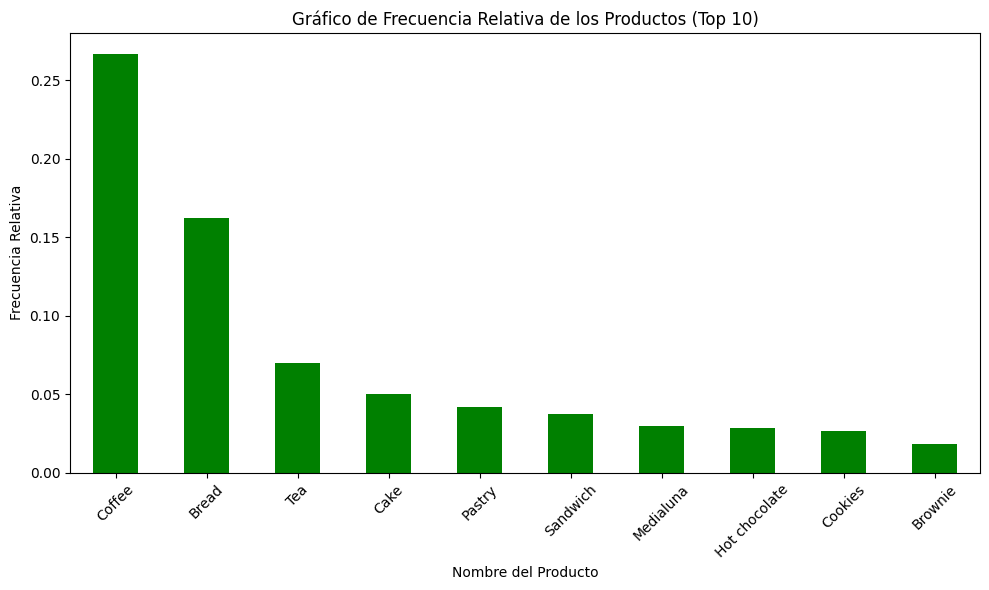

In [14]:
# Calcular frecuencia relativa
total_items = bakery['Item'].count()
relative_freq = (bakery['Item'].value_counts() / total_items).head(10)
# Graficar
plt.figure(figsize=(10,6))
relative_freq.plot(kind='bar', color='green')
plt.title('Gráfico de Frecuencia Relativa de los Productos (Top 10)')
plt.xlabel('Nombre del Producto')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
#The first thing to do is to transform the dataset in order to have
#the products as columns, and encoded 1-hot.
#After creating a Count variable, we proceed to encoding.
df = (bakery
 .groupby(['Transaction','Item']).size().rename('Count').reset_index()
 # Variable 'Count' created

 .groupby(['Transaction', 'Item'])['Count'].sum()
 .unstack().reset_index().fillna(0).set_index('Transaction'))
df

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#It is very important that we map every positive quantity to 1,
#and else to 0. Otherwise, the algorithm won't work.
def encode_data(datapoint):
	if datapoint <= 0:
		return 0
	else:
		return 1

df = df.applymap(encode_data)

/tmp/ipykernel_5312/3793797176.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(encode_data)


In [21]:
#Now, everything left is a matter of using the pre-built functions
# of the MLXtend library.
#We begin by excluding anything that has a support less than 2%.
#Said otherwise, if an itemset appears less than 2% in the dataset,
# we get rid of it.
itemsets = apriori(df, min_support=0.02, use_colnames=True)
itemsets.head()
print('We have a total of {} itemsets'.format(len(itemsets)))

We have a total of 33 itemsets


/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
rules = association_rules(itemsets, metric='lift', min_threshold=0.5) #Solo genera reglas cuya confianza sea al menos del 50 %.
rules.sort_values('confidence', ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
21,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
23,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
9,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
15,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
25,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,1.0,-0.018366,0.802014,-0.300482,0.087310,-0.246862,0.226935
5,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884


In [25]:
#We can filter by values that are relevant, for example,
# a confidence of at least 60% and a lift of more than 1.
rec_rules = rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.6)]
rec_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936


### Selección de parametros

In [27]:
#pip install mlxtend pandas
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
# Cargar los datos
canasta = pd.read_csv("BreadBasket.csv")
canasta = canasta[canasta['Item'] != 'NONE'] # eliminar transacciones vacías
# Crear una tabla tipo "one-hot encoding"
basket = canasta.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipykernel_5312/3605712547.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [28]:
support_levels = [0.1, 0.05, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# Crear diccionarios vacíos para guardar resultados
rules_sup10 = []
rules_sup5 = []
rules_sup1 = []
rules_sup0_5 = []

In [29]:
for conf in confidence_levels:
 # Soporte 10%
 freq_items = apriori(basket, min_support=support_levels[0], use_colnames=True)
 rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
 rules_sup10.append(len(rules))

 # Soporte 5%
 freq_items = apriori(basket, min_support=support_levels[1], use_colnames=True)
 rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
 rules_sup5.append(len(rules))

 # Soporte 1%
 freq_items = apriori(basket, min_support=support_levels[2], use_colnames=True)
 rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
 rules_sup1.append(len(rules))

 # Soporte 0.5%
 freq_items = apriori(basket, min_support=support_levels[3], use_colnames=True)
 rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
 rules_sup0_5.append(len(rules))

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: Deprecati

In [30]:
resultados = pd.DataFrame({
 'Confianza': confidence_levels,
 'Soporte 10%': rules_sup10,
 'Soporte 5%': rules_sup5,
 'Soporte 1%': rules_sup1,
 'Soporte 0.5%': rules_sup0_5
})
print(resultados)

   Confianza  Soporte 10%  Soporte 5%  Soporte 1%  Soporte 0.5%
0        0.9            0           0           0             0
1        0.8            0           0           0             1
2        0.7            0           0           1             2
3        0.6            0           0           1             4
4        0.5            0           1          11            17
5        0.4            0           1          16            25
6        0.3            0           1          19            35
7        0.2            0           2          31            57
8        0.1            0           4          44           103


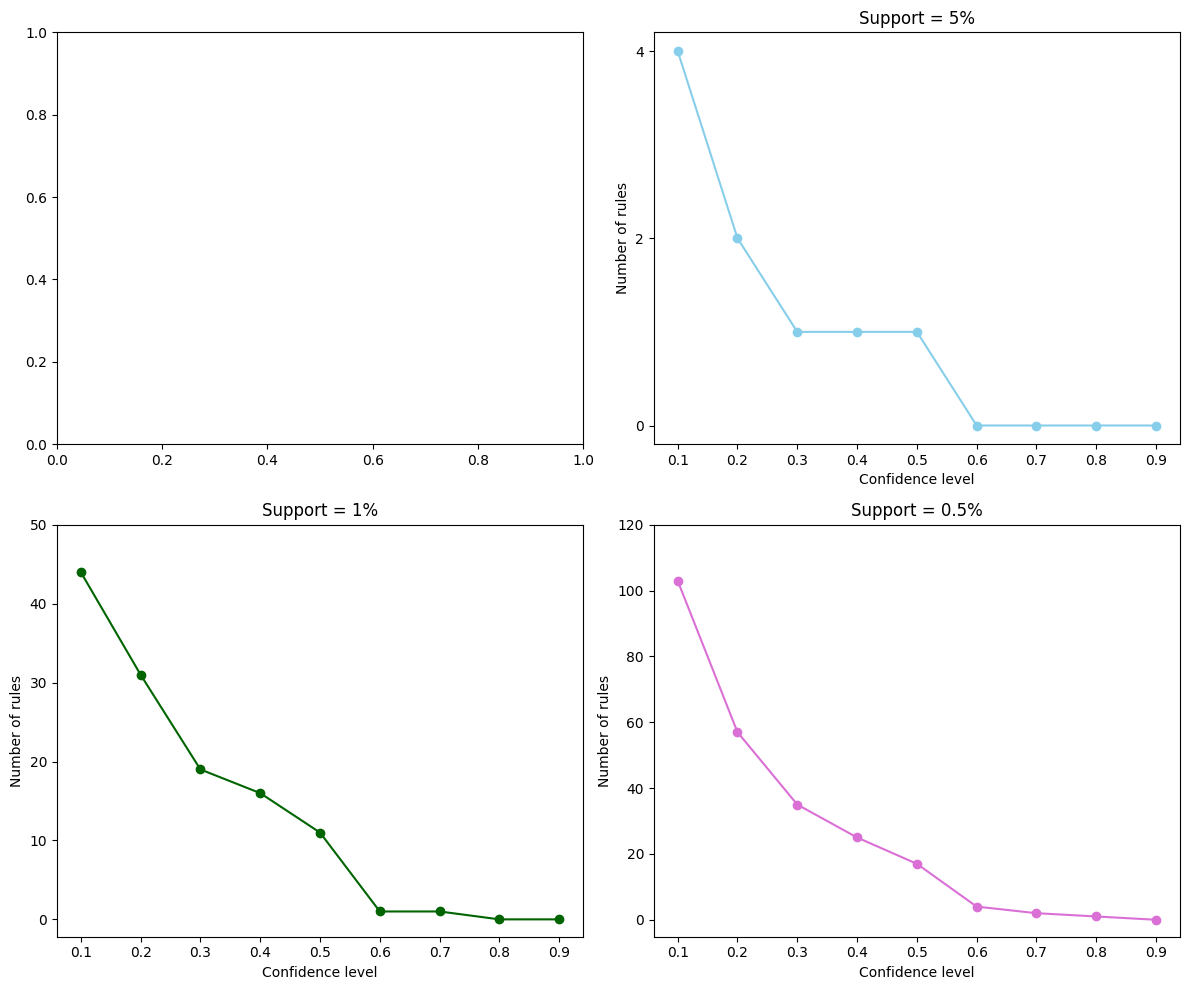

In [31]:
import matplotlib.pyplot as plt
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Soporte 5%
axs[0, 1].plot(confidence_levels, rules_sup5, marker='o', color='skyblue')
axs[0, 1].set_title("Support = 5%")
axs[0, 1].set_xlabel("Confidence level")
axs[0, 1].set_ylabel("Number of rules")
axs[0, 1].set_yticks(range(0, max(rules_sup5) + 2, 2))
# Soporte 1%
axs[1, 0].plot(confidence_levels, rules_sup1, marker='o', color='darkgreen')
axs[1, 0].set_title("Support = 1%")
axs[1, 0].set_xlabel("Confidence level")
axs[1, 0].set_ylabel("Number of rules")
axs[1, 0].set_yticks(range(0, max(rules_sup1) + 10, 10))
# Soporte 0.5%
axs[1, 1].plot(confidence_levels, rules_sup0_5, marker='o', color='orchid')
axs[1, 1].set_title("Support = 0.5%")
axs[1, 1].set_xlabel("Confidence level")
axs[1, 1].set_ylabel("Number of rules")
axs[1, 1].set_yticks(range(0, max(rules_sup0_5) + 20, 20))
plt.tight_layout()
plt.show()

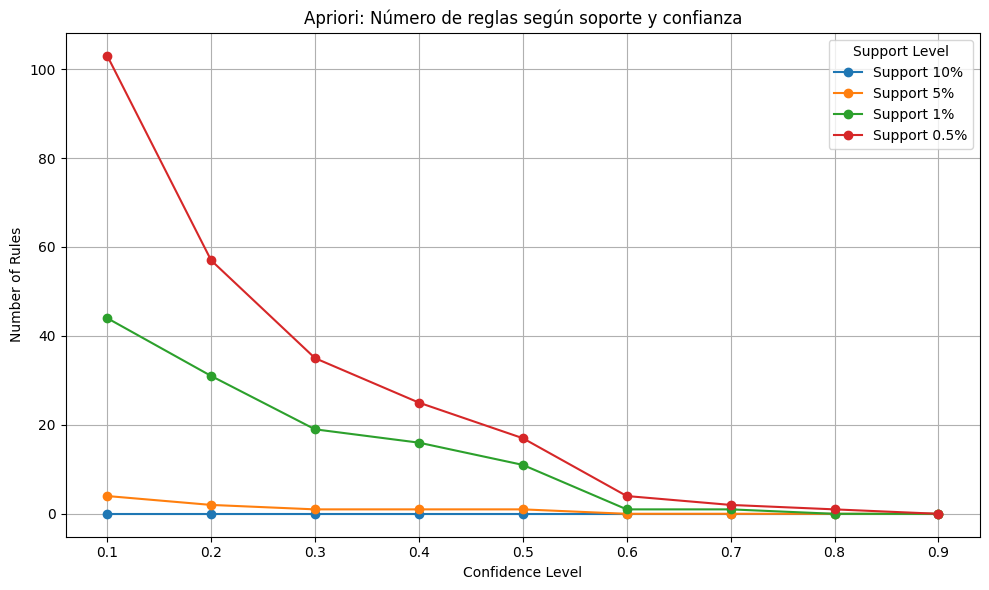

In [32]:
import pandas as pd
# Crear DataFrame con los datos
df_rules = pd.DataFrame({
 'Confidence': confidence_levels,
 'Support 10%': rules_sup10,
 'Support 5%': rules_sup5,
 'Support 1%': rules_sup1,
 'Support 0.5%': rules_sup0_5
})
# Gráfico combinado
plt.figure(figsize=(10, 6))
plt.plot(df_rules['Confidence'], df_rules['Support 10%'], marker='o', label='Support 10%')
plt.plot(df_rules['Confidence'], df_rules['Support 5%'], marker='o', label='Support 5%')
plt.plot(df_rules['Confidence'], df_rules['Support 1%'], marker='o', label='Support 1%')
plt.plot(df_rules['Confidence'], df_rules['Support 0.5%'], marker='o', label='Support 0.5%')
plt.title("Apriori: Número de reglas según soporte y confianza")
plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.legend(title="Support Level")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
# Paso 1: Obtener los itemsets frecuentes
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
# Paso 2: Generar las reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# Mostrar todas las reglas encontradas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas
print(rules)

         antecedents consequents  antecedent support  consequent support  \
0        (Alfajores)    (Coffee)            0.036344            0.478394   
1             (Cake)    (Coffee)            0.103856            0.478394   
2          (Cookies)    (Coffee)            0.054411            0.478394   
3    (Hot chocolate)    (Coffee)            0.058320            0.478394   
4            (Juice)    (Coffee)            0.038563            0.478394   
5        (Medialuna)    (Coffee)            0.061807            0.478394   
6           (Pastry)    (Coffee)            0.086107            0.478394   
7         (Sandwich)    (Coffee)            0.071844            0.478394   
8            (Scone)    (Coffee)            0.034548            0.478394   
9   (Spanish Brunch)    (Coffee)            0.018172            0.478394   
10           (Toast)    (Coffee)            0.033597            0.478394   

     support  confidence      lift  representativity  leverage  conviction  \
0   0.019

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
10,(Toast),(Coffee),0.023666,0.704403,1.472431
9,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
5,(Medialuna),(Coffee),0.035182,0.569231,1.189878
6,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235
4,(Juice),(Coffee),0.020602,0.534247,1.116750
7,(Sandwich),(Coffee),0.038246,0.532353,1.112792
1,(Cake),(Coffee),0.054728,0.526958,1.101515
8,(Scone),(Coffee),0.018067,0.522936,1.093107
2,(Cookies),(Coffee),0.028209,0.518447,1.083723
